# **Credit Risk Analytics: Predicting Loan Interest Rates and Default Probability**

In this project, the primary goal is to develop predictive models using multiple regression and logistic regression to gain insights into the factors influencing loan interest rates and to predict the likelihood of loan default.

**1. Multiple Regression Model for Interest Rate Prediction.**

The aim to build a multiple regression model to predict loan interest rates based on various individual characteristics.

The features considered for this model include:

person_age , person_income , person_home_ownership, person_emp_length, loan_intent, loan_amnt, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length

**2. Logistic Regression Model for Default Prediction. **

The second objective is to construct a logistic regression model to predict the likelihood of a loan default. The aim is to leverage the same set of features to analyze the characteristics of individuals who are more likely to default on a loan. The target variable for this model is 'loan_status,' indicating whether a loan has defaulted or not.

By exploring and interpreting the coefficients of the logistic regression model, we can identify key factors that significantly impact the likelihood of loan default. This insight can be valuable for risk assessment and decision-making in the lending process.

Through these predictive models, the aim is to provide a data-driven understanding of the factors influencing loan interest rates and the characteristics associated with loan default. The analysis will contribute to informed decision-making in the lending domain.

**Data was sourced from Kaggle **

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
credit_risk_data = pd.read_csv('data/credit_risk_dataset.csv')
credit_risk_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


# EDA 

In [3]:
credit_risk_data['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [4]:
credit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
# get summary stats
credit_risk_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
#  count of null values in the employment length and interest rate columns
credit_risk_data.isnull().sum()[['person_emp_length','loan_int_rate']]

person_emp_length     895
loan_int_rate        3116
dtype: int64

In [7]:
# check for duplicates 
duplicates = credit_risk_data[credit_risk_data.duplicated()]

# Print the count of duplicates
print("Duplicate rows in the DataFrame:")
duplicates.count()

Duplicate rows in the DataFrame:


person_age                    165
person_income                 165
person_home_ownership         165
person_emp_length             157
loan_intent                   165
loan_amnt                     165
loan_int_rate                 144
loan_status                   165
loan_percent_income           165
cb_person_default_on_file     165
cb_person_cred_hist_length    165
dtype: int64

In [8]:
def clean_credit_risk_data(dataset):
    # Remove white space and lowercase all characters
    dataset = dataset.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
    
    # Remove rows where age > 80
    dataset = dataset[dataset['person_age'] <= 80]
    
    # Remove rows where employment length is > 80
    dataset = dataset[dataset['person_emp_length'] <= 70]

    # drop nulls
    dataset.dropna(subset = ['person_emp_length'], inplace=True)
    dataset.dropna(subset = ['loan_int_rate'], inplace=True)
    
    # drop duplicates
    dataset.drop_duplicates() 
    
    # Rename columns 
    dataset.rename(columns = {'person_age':'age',
                             'person_income': 'income',
                             'person_home_ownership': 'home_ownernship_status',
                             'person_emp_length': 'employment_length',
                             'loan_percent_income': 'percent_of_income',
                             'cb_person_default_on_file': 'historical_default',
                             'cb_person_cred_hist_length':'credit_history_length '},inplace = True)
    
    # Convert 'y' to 1 and 'n' to 0 in the 'historical_default' column
    dataset['historical_default'] = dataset['historical_default'].astype(str).replace({'y': '1', 'n': '0'})
    
    # Convert the column to numeric type
    dataset['historical_default'] = pd.to_numeric(dataset['historical_default'], errors='coerce')
    
    return dataset


# Clean the credit risk dataset using the function
cr_data = clean_credit_risk_data(credit_risk_data.copy())

# Print the cleaned dataset
print(cr_data)

       age  income home_ownernship_status  employment_length      loan_intent  \
1       21    9600                    own                5.0        education   
2       25    9600               mortgage                1.0          medical   
3       23   65500                   rent                4.0          medical   
4       24   54400                   rent                8.0          medical   
5       21    9900                    own                2.0          venture   
...    ...     ...                    ...                ...              ...   
32576   57   53000               mortgage                1.0         personal   
32577   54  120000               mortgage                4.0         personal   
32578   65   76000                   rent                3.0  homeimprovement   
32579   56  150000               mortgage                5.0         personal   
32580   66   42000                   rent                2.0          medical   

       loan_amnt  loan_int_

In [9]:
#check to see if data cleaning rules were applied
cr_data.head()

,age,income,home_ownernship_status,employment_length,loan_intent,loan_amnt,loan_int_rate,loan_status,percent_of_income,historical_default,credit_history_length
1,21,9600,own,5.0,education,1000,11.14,0,0.10,0,2
2,25,9600,mortgage,1.0,medical,5500,12.87,1,0.57,0,3
3,23,65500,rent,4.0,medical,35000,15.23,1,0.53,0,2
4,24,54400,rent,8.0,medical,35000,14.27,1,0.55,1,4
5,21,9900,own,2.0,venture,2500,7.14,1,0.25,0,2


**Strong Positive Correlations:**
* age and credit_history_length' have a strong positive correlation of 0.88.
* income and loan_amnt have a moderate positive correlation of 0.32.
* loan_amnt and percent_of_income have a strong positive correlation of 0.58.

**Strong Negative Correlation:**
* loan_status and percent_of_income have a strong negative correlation of -0.38.

**Weak Correlations:**
* Most other correlations are relatively weak (close to 0)

In [10]:
cr_data.corr()

,age,income,employment_length,loan_amnt,loan_int_rate,loan_status,percent_of_income,historical_default,credit_history_length
age,1.000000,0.141502,0.176532,0.056125,0.010734,-0.022363,-0.039355,0.009325,0.877732
income,0.141502,1.000000,0.160967,0.324767,-0.003747,-0.167020,-0.297627,-0.001242,0.122745
employment_length,0.176532,0.160967,1.000000,0.108393,-0.058291,-0.086500,-0.060114,-0.030411,0.151734
loan_amnt,0.056125,0.324767,0.108393,1.000000,0.145900,0.113364,0.577201,0.040061,0.045588
loan_int_rate,0.010734,-0.003747,-0.058291,0.145900,1.000000,0.339296,0.123383,0.500228,0.015508
loan_status,-0.022363,-0.167020,-0.086500,0.113364,0.339296,1.000000,0.379527,0.181860,-0.015498
percent_of_income,-0.039355,-0.297627,-0.060114,0.577201,0.123383,0.379527,1.000000,0.035815,-0.029736
historical_default,0.009325,-0.001242,-0.030411,0.040061,0.500228,0.181860,0.035815,1.000000,0.008561
credit_history_length,0.877732,0.122745,0.151734,0.045588,0.015508,-0.015498,-0.029736,0.008561,1.000000


# EDA - VISUALIZATION

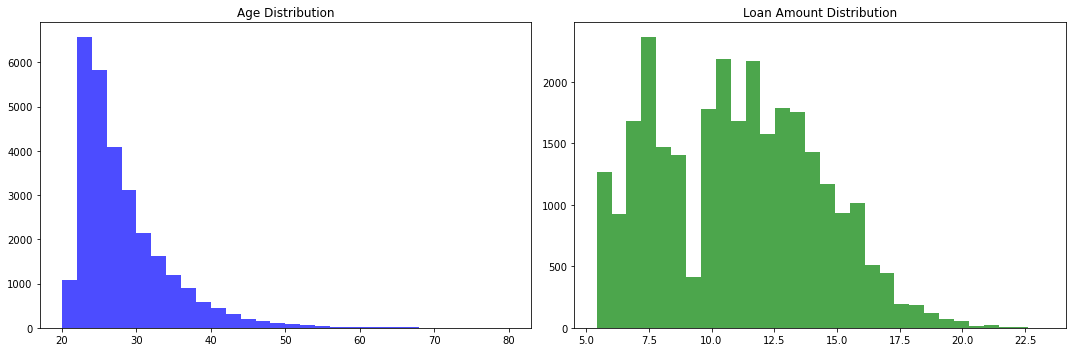

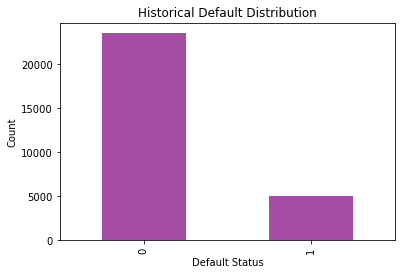

In [11]:
# Graphs plotted to better understand age and loan interest distribution
# this will allow us to see how spread/close apart age is and
# how wide of a band between the most risky and least risky 
# For better contex, assessing the count of default vs. no default to better understand
# how imbalanced/imbalanced the data is.

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot Age Distribution
axs[0].hist(cr_data['age'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Age Distribution')

# Plot Loan Amount Distribution
axs[1].hist(cr_data['loan_int_rate'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Loan Amount Distribution')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

# Plot Historical Default
default_counts = cr_data['historical_default'].value_counts()
plt.figure(figsize=(6, 4))
default_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Historical Default Distribution')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

# Build Model (to be updated)

**Multiple Linear Regression**
* Build model - need to split the data into train/test (80/20)

In [12]:
reg = linear_model.LinearRegression()

In [13]:
y = cr_data['loan_int_rate']
x = cr_data[['age', 'income']]

In [14]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [15]:
#for each one unit increase in age, the loan interest rate increase by approximately 0.0006
# for each increase in income, the loan interest rate decreases by approximately 0.000000337
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [16]:
#when age and income = 0 interest rate is around 10.8953
reg.intercept_

10.895290785116892

In [17]:
#predict interest rate for a 34 year old person who has an annual income of 120k
reg.predict([[34, 120000]])

array([11.05967359])

**Logistic Regression**
* What is the probability of default based on the values of independent variables?
* Are there issues of multicollinearity among the independent variables?
* How do age, income, and employment length collectively influence the likelihood of loan default?

In [19]:
from sklearn.linear_model import LinearRegression